<a href="https://colab.research.google.com/github/vilsonrodrigues/COVID19/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset brasileiro: "https://www.kaggle.com/unanimad/corona-virus-brazil "

No mundo: "https://ourworldindata.org/coronavirus-source-data"

**Importando Libs**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import datetime as dt

###Pré processamento de dados do Brasil e do mundo

**Dataset Brasileiro**

In [0]:
data_brazil = pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/COVID19/master/brazil_covid19.csv")
data_brazil.head()

,date,hour,state,suspects,refuses,cases
0,2020-01-30,16:00,Minas Gerais,1,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0
3,2020-01-30,16:00,São Paulo,3,1,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0


Organizando por estado

In [0]:
data_brazil = data_brazil.sort_values("state")
data_brazil

,date,hour,state,suspects,refuses,cases
455,2020-03-10,16:05,Acre,3,0,0
577,2020-03-15,19:15,Acre,3,0,0
527,2020-03-13,15:45,Acre,3,0,0
503,2020-03-12,16:20,Acre,3,0,0
479,2020-03-11,16:45,Acre,3,0,0
...,...,...,...,...,...,...
17,2020-02-01,12:00,São Paulo,8,2,0
609,2020-03-16,15:50,Tocantins,3,0,0
555,2020-03-14,16:25,Tocantins,2,0,0
582,2020-03-15,19:15,Tocantins,3,0,0


**Dataset mundial**

In [0]:
full_dataset = pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/COVID19/master/full_data.csv")
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1.0,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1.0,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1.0,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1.0,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1.0,NaN


**Dataset do Rio Grande do Norte Montando Por Mim**

In [102]:
data_RN = pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/COVID19/master/rn-covid19.csv",encoding="iso-8859-1")
data_RN.tail(2)

,date,state,city,full_suspects,full_cases,full_deaths
57,2020-03-20,RN,São Miguel do Gostoso,1,0,0
58,2020-03-20,RN,Tibau do Sul,1,0,0


Renomeando colunas para manter a padronização com os dados do dataset brasileiro

In [0]:
#full_dataset.rename(columns={"new_cases":"cases","new_deaths":"deaths"},inplace=True)

Todos os países presentes no dataset

In [0]:
full_dataset["location"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Swaziland',
       'Ethiopia', 'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guatemala', 'Guernsey',
       'Guinea', 'Guyana', 'Vatican', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Inte

Dados dos EUA, China, Italia, França e Espanha

In [0]:
data_US    = full_dataset.loc[full_dataset["location"] == "United States"]
data_China = full_dataset.loc[full_dataset["location"] == "China"]
data_Esp   = full_dataset.loc[full_dataset["location"] == "Spain"]
data_Fran  = full_dataset.loc[full_dataset["location"] == "France"]
data_Ita   = full_dataset.loc[full_dataset["location"] == "Italy"]

In [0]:
data_Ita.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
1187,2020-01-31,Italy,NaN,NaN,2.0,NaN
1188,2020-02-01,Italy,0.0,NaN,2.0,NaN
1189,2020-02-02,Italy,0.0,NaN,2.0,NaN
1190,2020-02-03,Italy,0.0,NaN,2.0,NaN
1191,2020-02-04,Italy,0.0,NaN,2.0,NaN


In [0]:
data_Ita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1187 to 1232
Data columns (total 6 columns):
date            46 non-null object
location        46 non-null object
new_cases       45 non-null float64
new_deaths      22 non-null float64
total_cases     46 non-null float64
total_deaths    23 non-null float64
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


Função geradora de index

In [0]:
def geraIndex(data_agrupado):

  #Cria dias acumulados, forma de referenciar os dias corridos
  data_agrupado["index"] = pd.RangeIndex(1,len(data_agrupado["date"])+1)

  #Limpa valores ausentes
  data_agrupado.fillna(0, inplace = True)

  return data_agrupado

Funções para acumular os dados, similar a Fibonnaci

In [0]:
def agrupaEAcumulaCamposBrasil(data_agrupado):
  data_agrupado["suspeitas_acumuladas"] = data_agrupado["suspects"].cumsum()
  data_agrupado["casos_acumulados"] = data_agrupado["cases"].cumsum()
  data_agrupado["negados_acumulados"] = data_agrupado["refuses"].cumsum()

  return data_agrupado

In [0]:
def agrupaEAcumulaCamposMundo(data_agrupado):  
  data_agrupado["novas_mortes_acumuladas"] = data_agrupado["new_deaths"].cumsum()
  data_agrupado["novos_casos_acumulados"] = data_agrupado["new_cases"].cumsum()
  data_agrupado["casos_totais_acumulados"] = data_agrupado["total_cases"].cumsum()
  data_agrupado["mortes_totais_acumuladas"] = data_agrupado["total_deaths"].cumsum()

  return data_agrupado

Funções para agrupar os casos por dia e somar, e depois acumular os casos

In [0]:
def agrupaPorDataBrazil(data):
  data_agrupado = data.groupby(["date"])[["suspects","refuses","cases"]].sum().reset_index()
  data_agrupado = agrupaEAcumulaCamposBrasil(data_agrupado)
  data_agrupado = geraIndex(data_agrupado)
  return data_agrupado

In [0]:
def agrupaPorEstadosDoBrasil(data):
  data_agrupado = data.groupby(["date","state"])[["suspects","refuses","cases"]].sum().reset_index()
  #data_agrupado = agrupaEAcumulaCamposBrasil(data_agrupado)
  #data_agrupado = geraIndex(data_agrupado)
  data_agrupado = data_agrupado.sort_values(["state","date"])
  return data_agrupado

In [0]:
def agrupaPorDataMundo(data):
  data_agrupado = data.groupby(["date"])[["new_cases","new_deaths","total_cases","total_deaths"]].sum().reset_index()
  data_agrupado = agrupaEAcumulaCamposMundo(data_agrupado)
  data_agrupado = geraIndex(data_agrupado)
  return data_agrupado

Chamada das funções de transformação do dataset

In [0]:
data_Brazil = agrupaPorDataBrazil(data_brazil)
data_Estados_Brazil = agrupaPorEstadosDoBrasil(data_brazil)

In [0]:
data_China  = agrupaPorDataMundo(data_China)
data_Ita    = agrupaPorDataMundo(data_Ita)
data_Fran   = agrupaPorDataMundo(data_Fran)
data_US     = agrupaPorDataMundo(data_US)
data_Esp    = agrupaPorDataMundo(data_Esp)

In [0]:
data_Ita.head(2)

,date,new_cases,new_deaths,total_cases,total_deaths,novas_mortes_acumuladas,novos_casos_acumulados,casos_totais_acumulados,mortes_totais_acumuladas,index
0,2020-01-31,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1
1,2020-02-01,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,2


In [0]:
data_Brazil.head(2)

,date,suspects,refuses,cases,suspeitas_acumuladas,casos_acumulados,negados_acumulados,index
0,2020-01-30,9,6,0,9,0,6,1
1,2020-01-31,13,9,0,22,0,15,2


In [0]:
data_Estados_Brazil.head(2)

,date,state,suspects,refuses,cases
439,2020-03-10,Acre,3,0,0
463,2020-03-11,Acre,3,0,0


###Visualização Gráfica

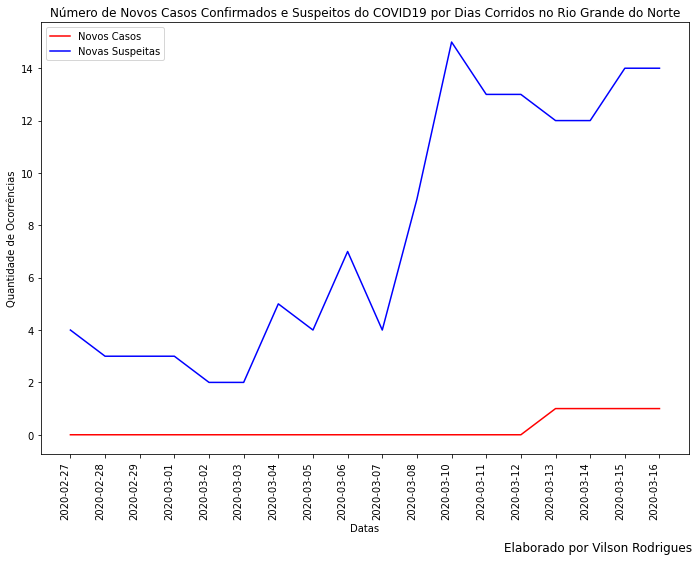

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]
axes.plot("date","cases",data = data_Estados_Brazil.loc[data_Estados_Brazil["state"] == "Rio Grande do Norte"],c="r",label="Novos Casos")
axes.plot("date","suspects",data = data_Estados_Brazil.loc[data_Estados_Brazil["state"] == "Rio Grande do Norte"],c="b",label="Novas Suspeitas")
#Titulo
plt.title("Número de Novos Casos Confirmados e Suspeitos do COVID19 por Dias Corridos no Rio Grande do Norte")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=-0.20)
#Eixos
plt.xlabel("Datas")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.xticks(rotation=90, ha='right')#rotacionar labels
plt.show()
#plt.savefig("figura1.jpg",dpi=1000)

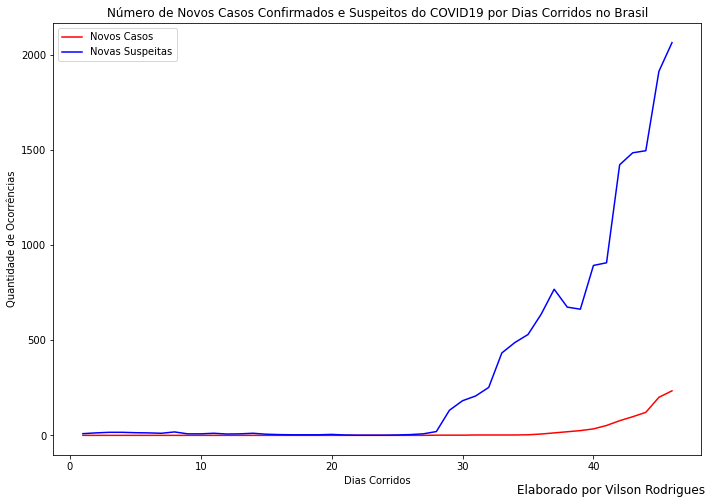

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

axes.plot("index","cases",data=data_Brazil,c="r",label="Novos Casos")
axes.plot("index","suspects",data=data_Brazil,c="b",label="Novas Suspeitas")
#Titulo
plt.title("Número de Novos Casos Confirmados e Suspeitos do COVID19 por Dias Corridos no Brasil")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura1.jpg",dpi=1000)

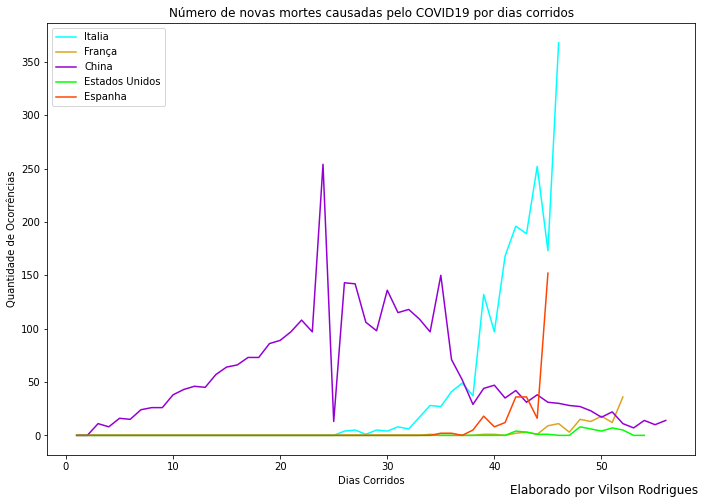

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

#axes.plot("index","casos_confirmados_acumulados",data=data_Brazil.iloc[:45],c="#00FF7F",label="Brazil")
axes.plot("index","new_deaths",data=data_Ita,c="#00FFFF",label="Italia")
axes.plot("index","new_deaths",data=data_Fran,c="#DAA520",label="França")
axes.plot("index","new_deaths",data=data_China,c="#9400D3",label="China")
axes.plot("index","new_deaths",data=data_US,c="#00FF00",label="Estados Unidos")
axes.plot("index","new_deaths",data=data_Esp,c="#FF4500",label="Espanha")

#Titulo
plt.title("Número de Novas Mortes Causadas pelo COVID19 por Dias Corridos")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura2.jpg",dpi=500)

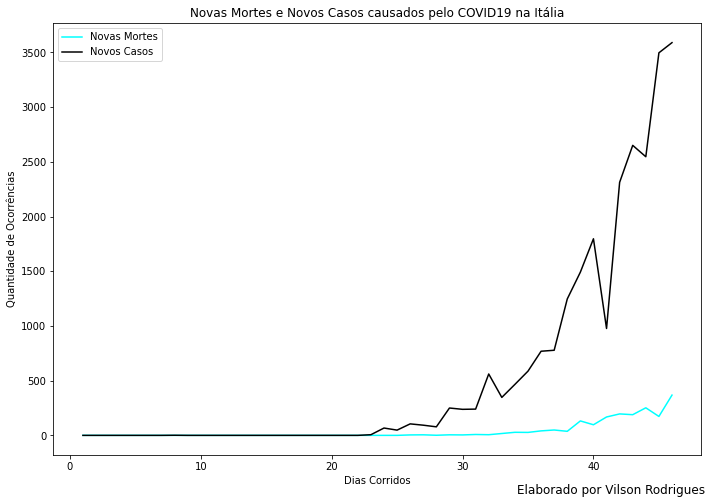

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

axes.plot("index","new_deaths",data=data_Ita,c="#00FFFF",label="Novas Mortes")
axes.plot("index","new_cases",data=data_Ita,c="#000000",label="Novos Casos")

#Titulo
plt.title("Novas Mortes e Novos Casos causados pelo COVID19 na Itália")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura2.jpg",dpi=500)

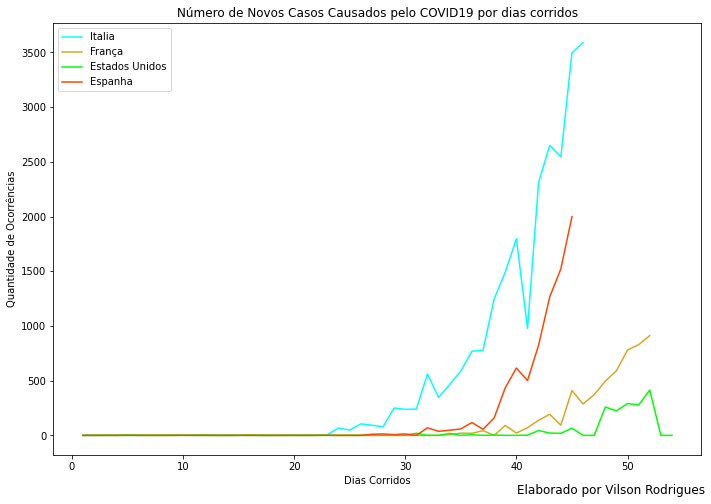

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

#axes.plot("index","casos_acumulados",data=data_Brazil.iloc[:45],c="#00FF7F",label="Brazil")
axes.plot("index","new_cases",data=data_Ita,c="#00FFFF",label="Italia")
axes.plot("index","new_cases",data=data_Fran,c="#DAA520",label="França")
#axes.plot("index","new_cases",data=data_China,c="#9400D3",label="China")
axes.plot("index","new_cases",data=data_US,c="#00FF00",label="Estados Unidos")
axes.plot("index","new_cases",data=data_Esp,c="#FF4500",label="Espanha")

#Titulo
plt.title("Número de Novos Casos Causados pelo COVID19 por dias corridos")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura2.jpg",dpi=500)

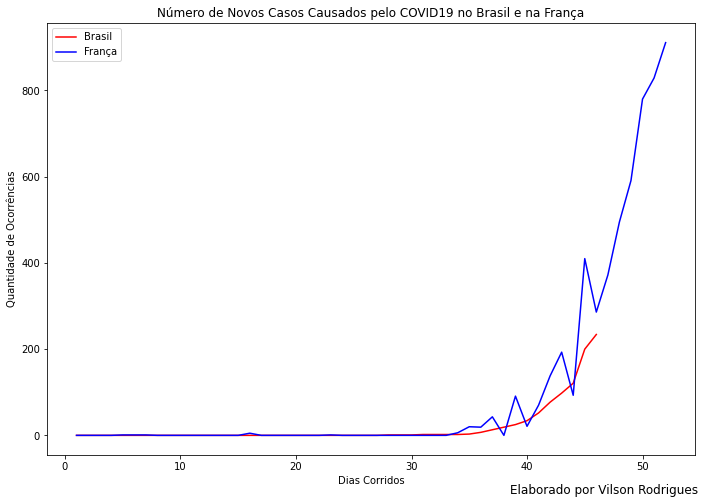

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

axes.plot("index","cases",data=data_brazil,c="r",label="Brasil")
axes.plot("index","new_cases",data=data_Fran,c="b",label="França")
#Titulo
plt.title("Número de Novos Casos Causados pelo COVID19 no Brasil e na França")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura1.jpg",dpi=1000)

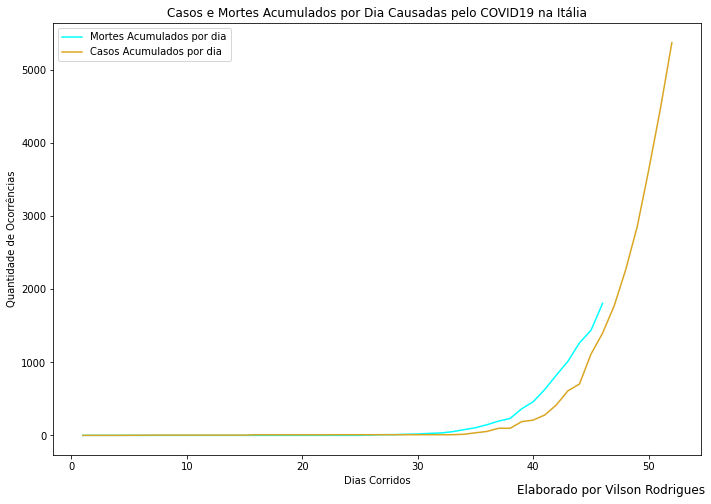

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,1.5])#[left, bottom, width, height]

axes.plot("index","novas_mortes_acumuladas",data=data_Ita,c="#00FFFF",label="Mortes Acumulados por dia")
axes.plot("index","novos_casos_acumulados",data=data_Fran,c="#DAA520",label="Casos Acumulados por dia")

#Titulo
plt.title("Casos e Mortes Acumulados por Dia Causadas pelo COVID19 na Itália")
plt.suptitle("Elaborado por Vilson Rodrigues",x=1.39,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Quantidade de Ocorrências")
axes.legend(loc="upper left")
plt.show()
#plt.savefig("figura2.jpg",dpi=500)

Fazendo anotações

In [0]:
fig, ax = plt.subplots()
ax.bar(x, y)
ax.annotate("Maior valor", 
            xy=(10, 12),
            xycoords='data',
            xytext=(11, 10),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.show()

### Visualização nos municípios do RN

In [51]:
data_RN.head(2)

,date,state,city,full_suspects,full_cases,full_deaths
0,2020-02-28,RN,Natal,5,0,0
1,2020-02-28,RN,Parnamirim,1,0,0


CSV público conteudo longitude e latitude dos municípios no brasil

In [94]:
city_lat_long =  pd.read_csv("https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/master/csv/municipios.csv")
city_lat_long.head(2)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.7573,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,31


Selecionando somente as cidades do RN para evitar risco de conflito de nome e dar localização errada

In [96]:
city_lat_long_rn = city_lat_long.loc[city_lat_long["codigo_uf"] == 24,["nome","latitude","longitude"]]
city_lat_long_rn.rename(columns={"nome":"city"},inplace = True)
city_lat_long_rn.head(2)

,city,latitude,longitude
21,Acari,-6.42820,-36.6347
28,Açu,-5.58362,-36.9140


Todas as cidades do RN que estão no dataframe

In [92]:
city_lat_long_rn["nome"].unique()

array(['Acari', 'Açu', 'Afonso Bezerra', 'Água Nova', 'Alexandria',
       'Almino Afonso', 'Alto do Rodrigues', 'Angicos', 'Antônio Martins',
       'Apodi', 'Areia Branca', 'Arês', 'Augusto Severo (Campo Grande)',
       'Baía Formosa', 'Baraúna', 'Barcelona', 'Bento Fernandes', 'Bodó',
       'Bom Jesus', 'Brejinho', 'Caiçara do Norte',
       'Caiçara do Rio do Vento', 'Caicó', 'Campo Redondo',
       'Canguaretama', 'Caraúbas', 'Carnaúba dos Dantas', 'Carnaubais',
       'Ceará-Mirim', 'Cerro Corá', 'Coronel Ezequiel',
       'Coronel João Pessoa', 'Cruzeta', 'Currais Novos',
       'Doutor Severiano', 'Encanto', 'Equador', 'Espírito Santo',
       'Extremoz', 'Felipe Guerra', 'Fernando Pedroza', 'Florânia',
       'Francisco Dantas', 'Frutuoso Gomes', 'Galinhos', 'Goianinha',
       'Governador Dix-Sept Rosado', 'Grossos', 'Guamaré',
       'Ielmo Marinho', 'Ipanguaçu', 'Ipueira', 'Itajá', 'Itaú', 'Jaçanã',
       'Jandaíra', 'Janduís', 'Januário Cicco (Boa Saúde)', 'Japi',
     

Concatenando pelo nome

In [103]:
data_city_RN = data_RN.merge(city_lat_long_rn, on = "city")
data_city_RN = data_city_RN.sort_values("date")
data_city_RN

,date,state,city,full_suspects,full_cases,full_deaths,latitude,longitude
0,2020-02-28,RN,Natal,5,0,0,-5.79357,-35.1986
10,2020-02-28,RN,Parnamirim,1,0,0,-5.91116,-35.2710
1,2020-03-02,RN,Natal,4,0,0,-5.79357,-35.1986
11,2020-03-02,RN,Parnamirim,1,0,0,-5.91116,-35.2710
2,2020-03-03,RN,Natal,3,0,0,-5.79357,-35.1986
12,2020-03-03,RN,Parnamirim,1,0,0,-5.91116,-35.2710
3,2020-03-05,RN,Natal,2,0,0,-5.79357,-35.1986
13,2020-03-05,RN,Parnamirim,2,0,0,-5.91116,-35.2710
4,2020-03-06,RN,Natal,3,0,0,-5.79357,-35.1986
14,2020-03-06,RN,Parnamirim,1,0,0,-5.91116,-35.2710


In [0]:
coordenate = []
for lat,lng in zip(data_city_RN["latitude"],data_city_RN["longitude"]):
	coordenate.append([lat,lng])

Renderizando o mapa com um valor qualquer

In [105]:
map = folium.Map(location=[-5.79448,-35.211])#latitude and longitude
map

Mapa de Calor de Onde teve Casos Suspeitos no RN

In [108]:
map.add_child(plugins.HeatMap(coordenate))
map

Salvando mapa

In [0]:
map.save("map-covid19-rn.html")

###Previsão de casos, mortes e suspeitas

In [0]:
data_Brazil.head(1)

,date,suspects,refuses,cases,suspeitas_acumuladas,casos_acumulados,negados_acumulados,index
0,2020-01-30,9,6,0,9,0,6,1


In [0]:
data_Estados_Brazil.head(1)

,date,state,suspects,refuses,cases
439,2020-03-10,Acre,3,0,0


In [0]:
data_Ita.tail(1)

,date,new_cases,new_deaths,total_cases,total_deaths,novas_mortes_acumuladas,novos_casos_acumulados,casos_totais_acumulados,mortes_totais_acumuladas,index
45,2020-03-16,3590.0,368.0,24747.0,1809.0,1807.0,24745.0,145413.0,8774.0,46


####LARS Lasso

In [0]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)

In [0]:
reg.fit([data_Ita["index"]],[data_Ita["new_cases"]])

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [0]:
reg.predict(np.array([[47]]))

####Lib da Regressão Linear

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [0]:
reg.fit(data_brazil["index"].values.reshape(-1,1),data_brazil["cases"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.score(data_brazil["index"].values.reshape(-1,1),data_brazil["cases"])

0.350870474573837

In [0]:
reg.predict(np.array([[47]]).reshape(-1,1))

array([71.32173913])